<a href="https://colab.research.google.com/github/wynn918/ML/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
wine = load_wine()
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [ ]:
Xtrain.shape

(124, 13)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)#randome_state control the random select
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9259259259259259

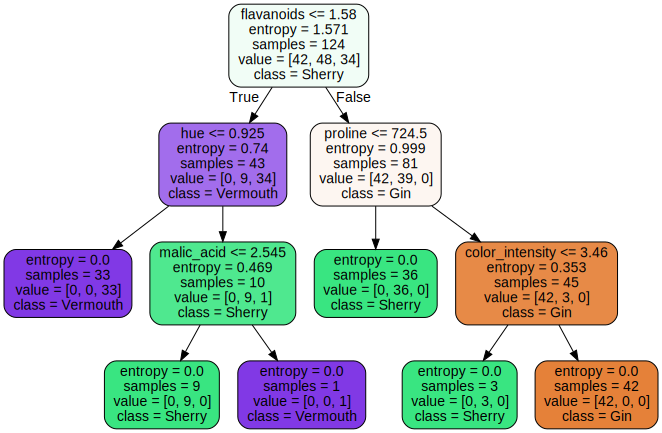

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ["Gin","Sherry","Vermouth"]
                                ,filled = True #filled with color
                                ,rounded = True #The box becomes a round box
                                )
graph = graphviz.Source(dot_data)
graph

In [ ]:
clf.feature_importances_

array([0.        , 0.02407685, 0.        , 0.        , 0.        ,
       0.        , 0.42119445, 0.        , 0.        , 0.08163192,
       0.13931011, 0.        , 0.33378666])

In [ ]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.024076852379931315),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.421194449990406),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.08163192358741928),
 ('hue', 0.1393101148345778),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.33378665920766565)]

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  #,random_state=30
                                  ,splitter= "random" )#splitter: best, will chose the more important feature(higher feature+_importance)
                                                              # random, will chose random feature
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9629629629629629

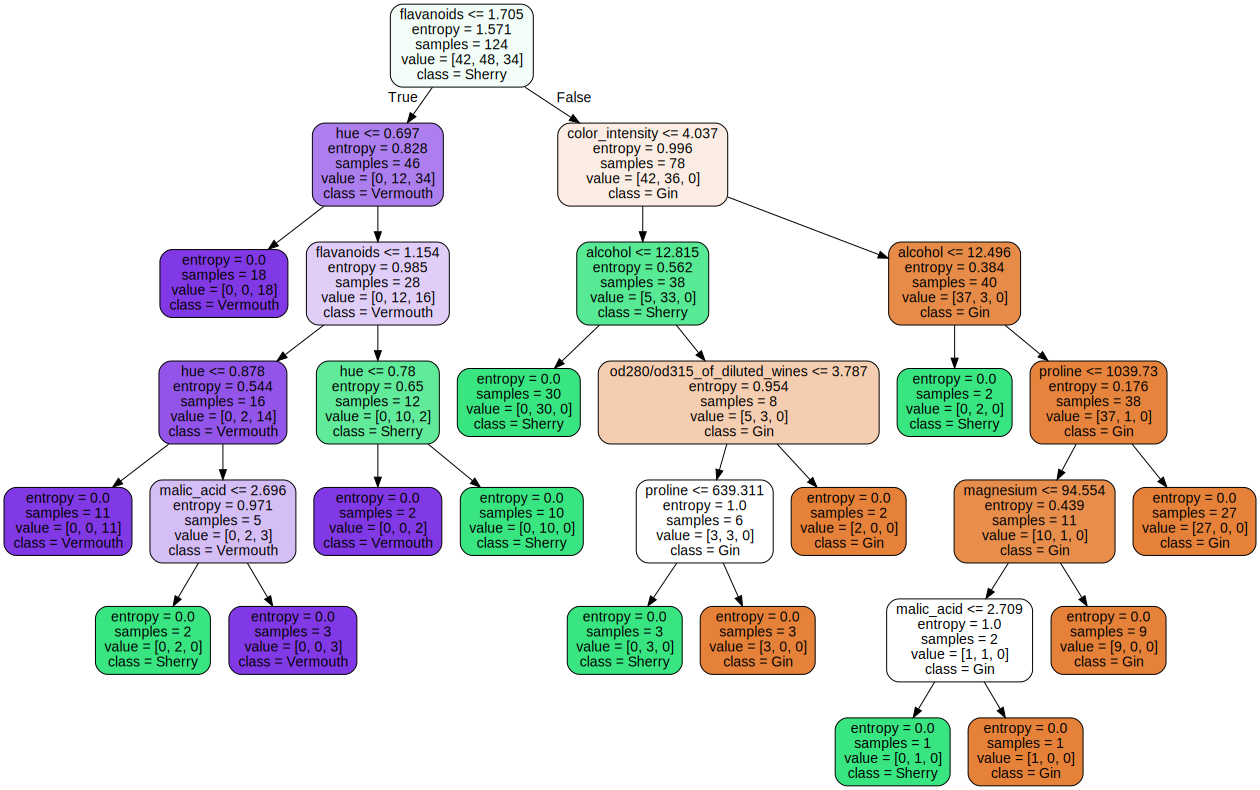

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ["Gin","Sherry","Vermouth"]
                                ,filled = True #filled with color
                                ,rounded = True #The box becomes a round box
                                )
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Prevent overfitting
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

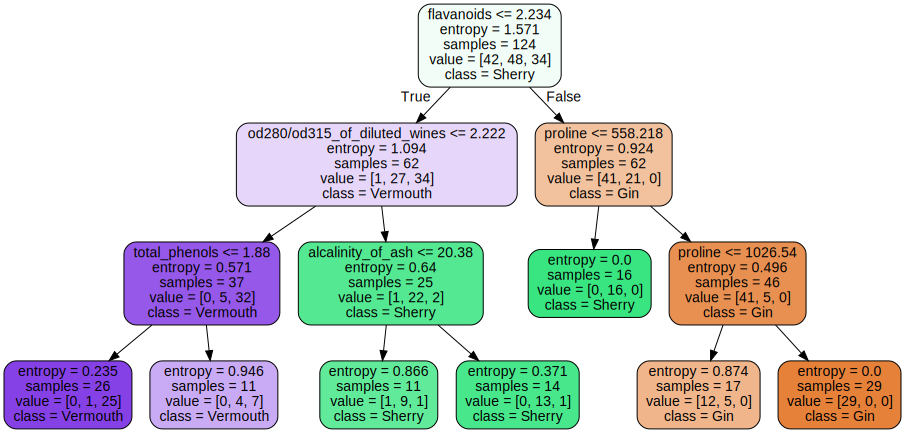

In [ ]:
#max_depth start from 3; min_sample_leaf: sample number in leaf,start from 5; min_sampel_split: unless fix number that the leaf could be splitted
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter= "random"
                                  ,max_depth=3 
                                  ,min_samples_split=10
                                  ,min_samples_leaf=10)
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ["Gin","Sherry","Vermouth"]
                                ,filled = True #filled with color
                                ,rounded = True #The box becomes a round box
                                )
graph = graphviz.Source(dot_data)
graph

In [ ]:
score_train = clf.score(Xtrain,Ytrain)
score_train

0.8951612903225806

In [ ]:
#max_features; min_impurity_decrease

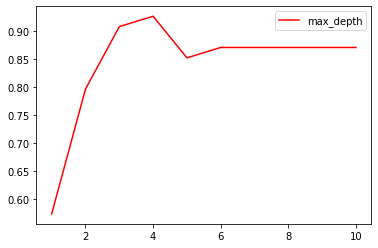

In [ ]:
#Hyperparametric learning curve
import matplotlib.pyplot as plt
test=[]
for i in range(10):
  clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random")
  clf = clf.fit(Xtrain,Ytrain)
  score = clf.score(Xtest,Ytest)
  test.append(score)
plt.plot(range(1,11),test,color='red',label="max_depth")
plt.legend()
plt.show()

In [ ]:
# class_weight：Give more weight to the feature with small samples
# min_weight_fraction_leaf: based on the class_weight
# apply: Returns the index of the leaf node on which each test sample
# predict: Returns the classification/regressions results for each test sample

In [ ]:
clf.apply(Xtest)

array([29, 30,  5, 10, 24, 12, 19, 30, 12, 28, 30, 30, 30,  3,  3, 24, 24,
       24,  3, 22, 12, 12, 12,  3, 30,  3, 24, 12, 12,  3,  3, 30, 12, 12,
        3,  3,  3, 12, 24, 30, 30, 12, 30,  3, 30,  3,  3,  3, 12,  3,  3,
       27,  3, 12])

In [ ]:
clf.predict(Xtest)

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 1])